In [4]:
import pandas as pd
import dask.dataframe as dd
import numpy as np

import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sn
from mpl_toolkits.mplot3d import Axes3D

/Users/mammadli/miniconda3/envs/py_jop/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 13.0.0. Please consider upgrading.
  warnings.warn(


### Load .csv files, drop dublicates and non-netflow data, save in parquet file format

In [23]:
df_ToN = pd.read_parquet('../data/parquet/netflow/no_ip_port/NF-ToN-IoT-v2_chunks')
df_BoT = pd.read_parquet('../data/parquet/netflow/no_ip_port/NF-BoT-IoT-v2_chunks')

In [4]:
df_BoT.describe()

,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
count,3.776350e+07,3.776350e+07,3.776350e+07,3.776350e+07,3.776350e+07,3.776350e+07,3.776350e+07,3.776350e+07,3.776350e+07
mean,1.134469e+01,9.468668e+01,5.461975e+02,2.042243e+02,2.657874e+00,3.019497e-01,3.471138e+00,3.999065e+06,9.964241e-01
std,5.498309e+00,9.074586e+01,1.024075e+05,9.803073e+04,9.731695e+01,6.280447e+01,7.053980e+00,1.085746e+06,5.969149e-02
min,1.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,7.000000e+00,5.600000e+01,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,4.293420e+06,1.000000e+00
50%,6.000000e+00,7.000000e+00,1.120000e+02,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,4.293811e+06,1.000000e+00
75%,1.700000e+01,1.880000e+02,2.800000e+02,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,4.294173e+06,1.000000e+00
max,5.800000e+01,2.480000e+02,1.890273e+08,1.969787e+08,4.915300e+04,3.786400e+04,2.140000e+02,4.294966e+06,1.000000e+00


In [5]:
df_ToN.describe()

,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
count,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07,1.694050e+07
mean,7.615534e+00,1.377321e+01,7.263503e+02,8.366019e+02,6.359542e+00,3.216062e+00,1.279886e+01,7.928600e+05,6.399474e-01
std,3.925834e+00,3.202067e+01,1.433178e+05,1.017853e+05,5.091666e+02,2.580863e+02,1.128540e+01,1.666282e+06,4.800153e-01
min,1.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,0.000000e+00,4.400000e+01,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,0.000000e+00,5.200000e+01,4.000000e+01,1.000000e+00,1.000000e+00,1.700000e+01,0.000000e+00,1.000000e+00
75%,6.000000e+00,7.000000e+00,2.760000e+02,1.800000e+02,4.000000e+00,3.000000e+00,2.200000e+01,0.000000e+00,1.000000e+00
max,5.800000e+01,2.480000e+02,3.019262e+08,1.644688e+08,4.692810e+05,4.109030e+05,2.230000e+02,4.294966e+06,1.000000e+00


In [6]:
df1 = df_BoT.sample(n=2000, random_state=1)
df1.shape

(2000, 9)

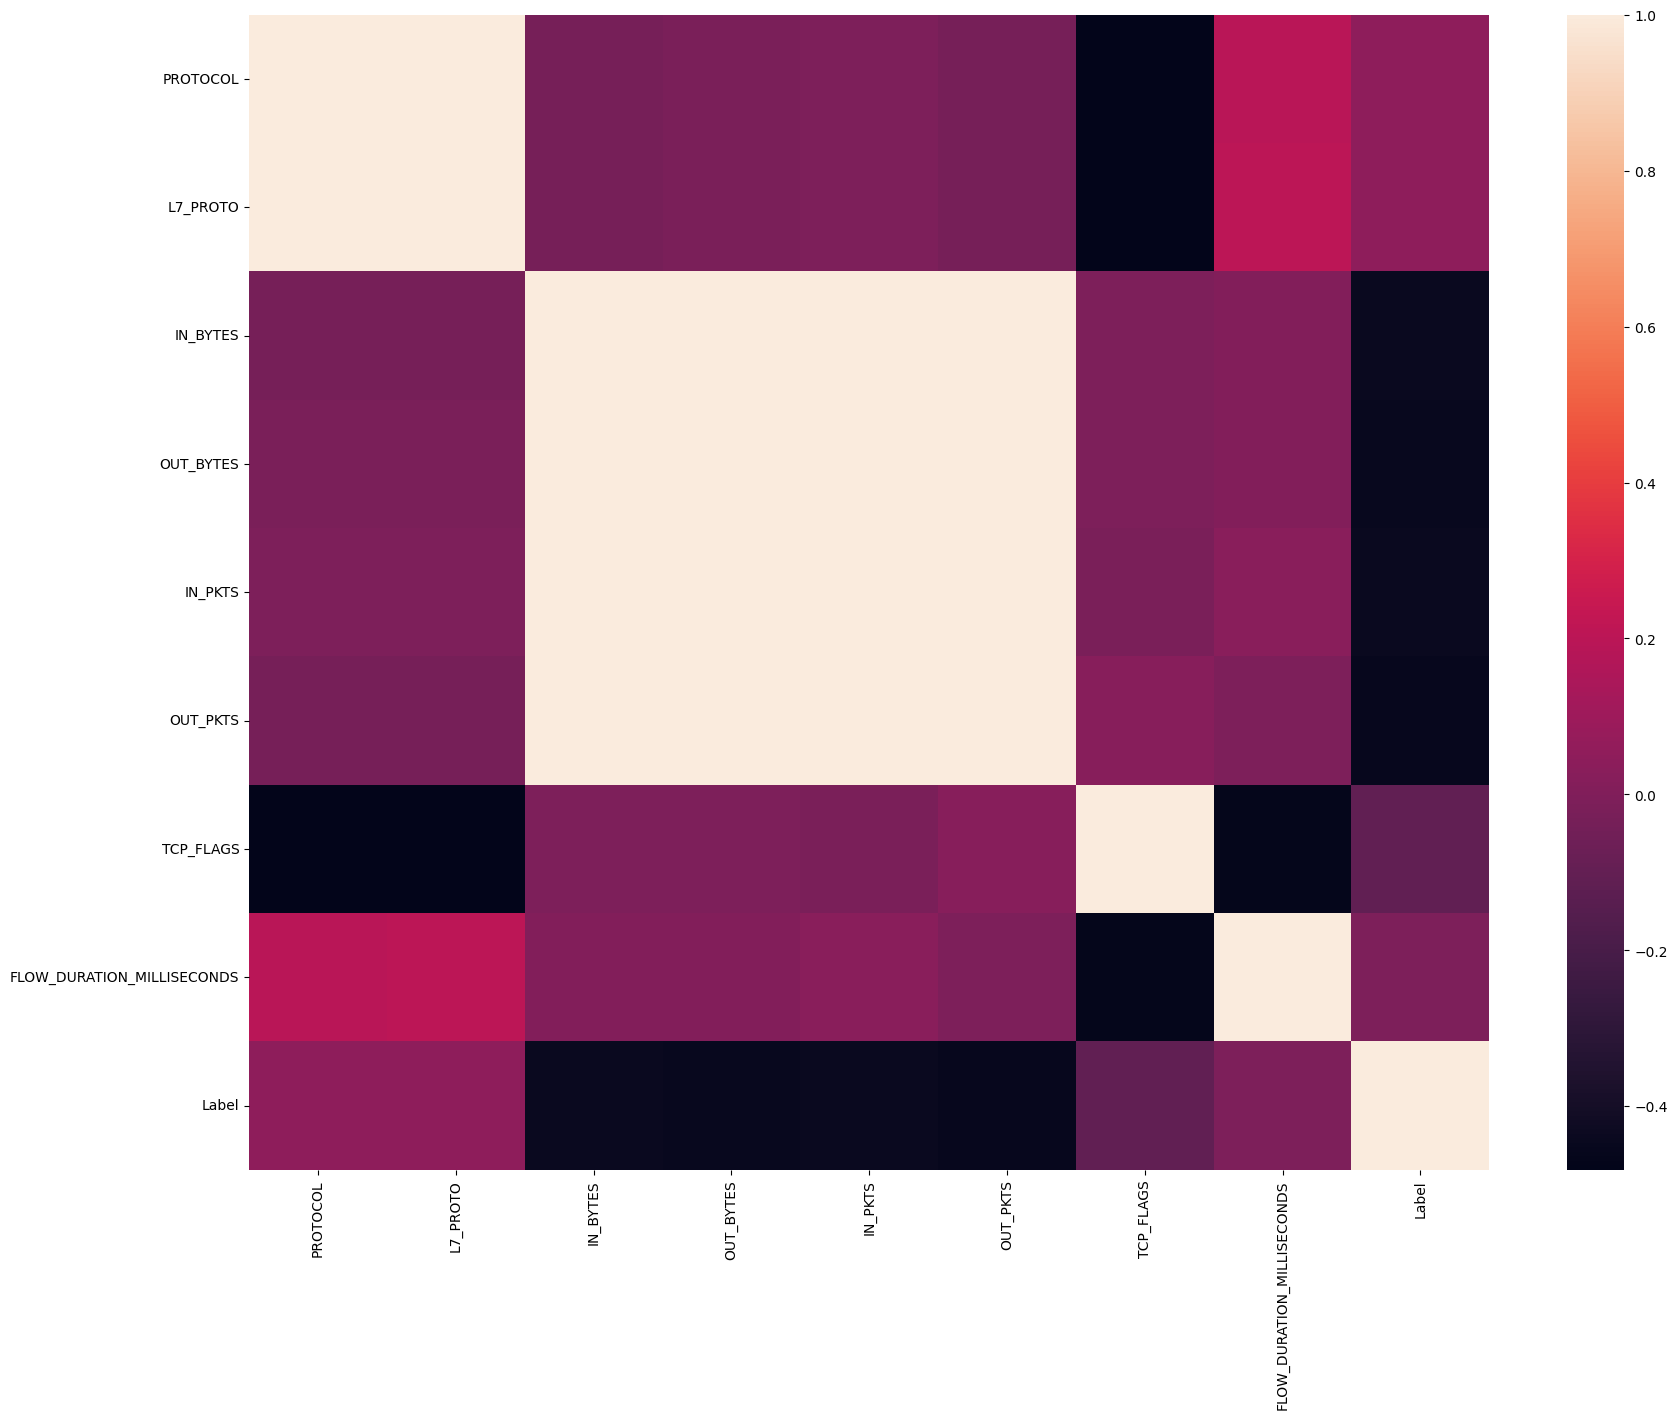

In [5]:
matrix = df1.corr()
plt.subplots(figsize=(20,15))
sn.heatmap(matrix)#, annot=True)
plt.show()

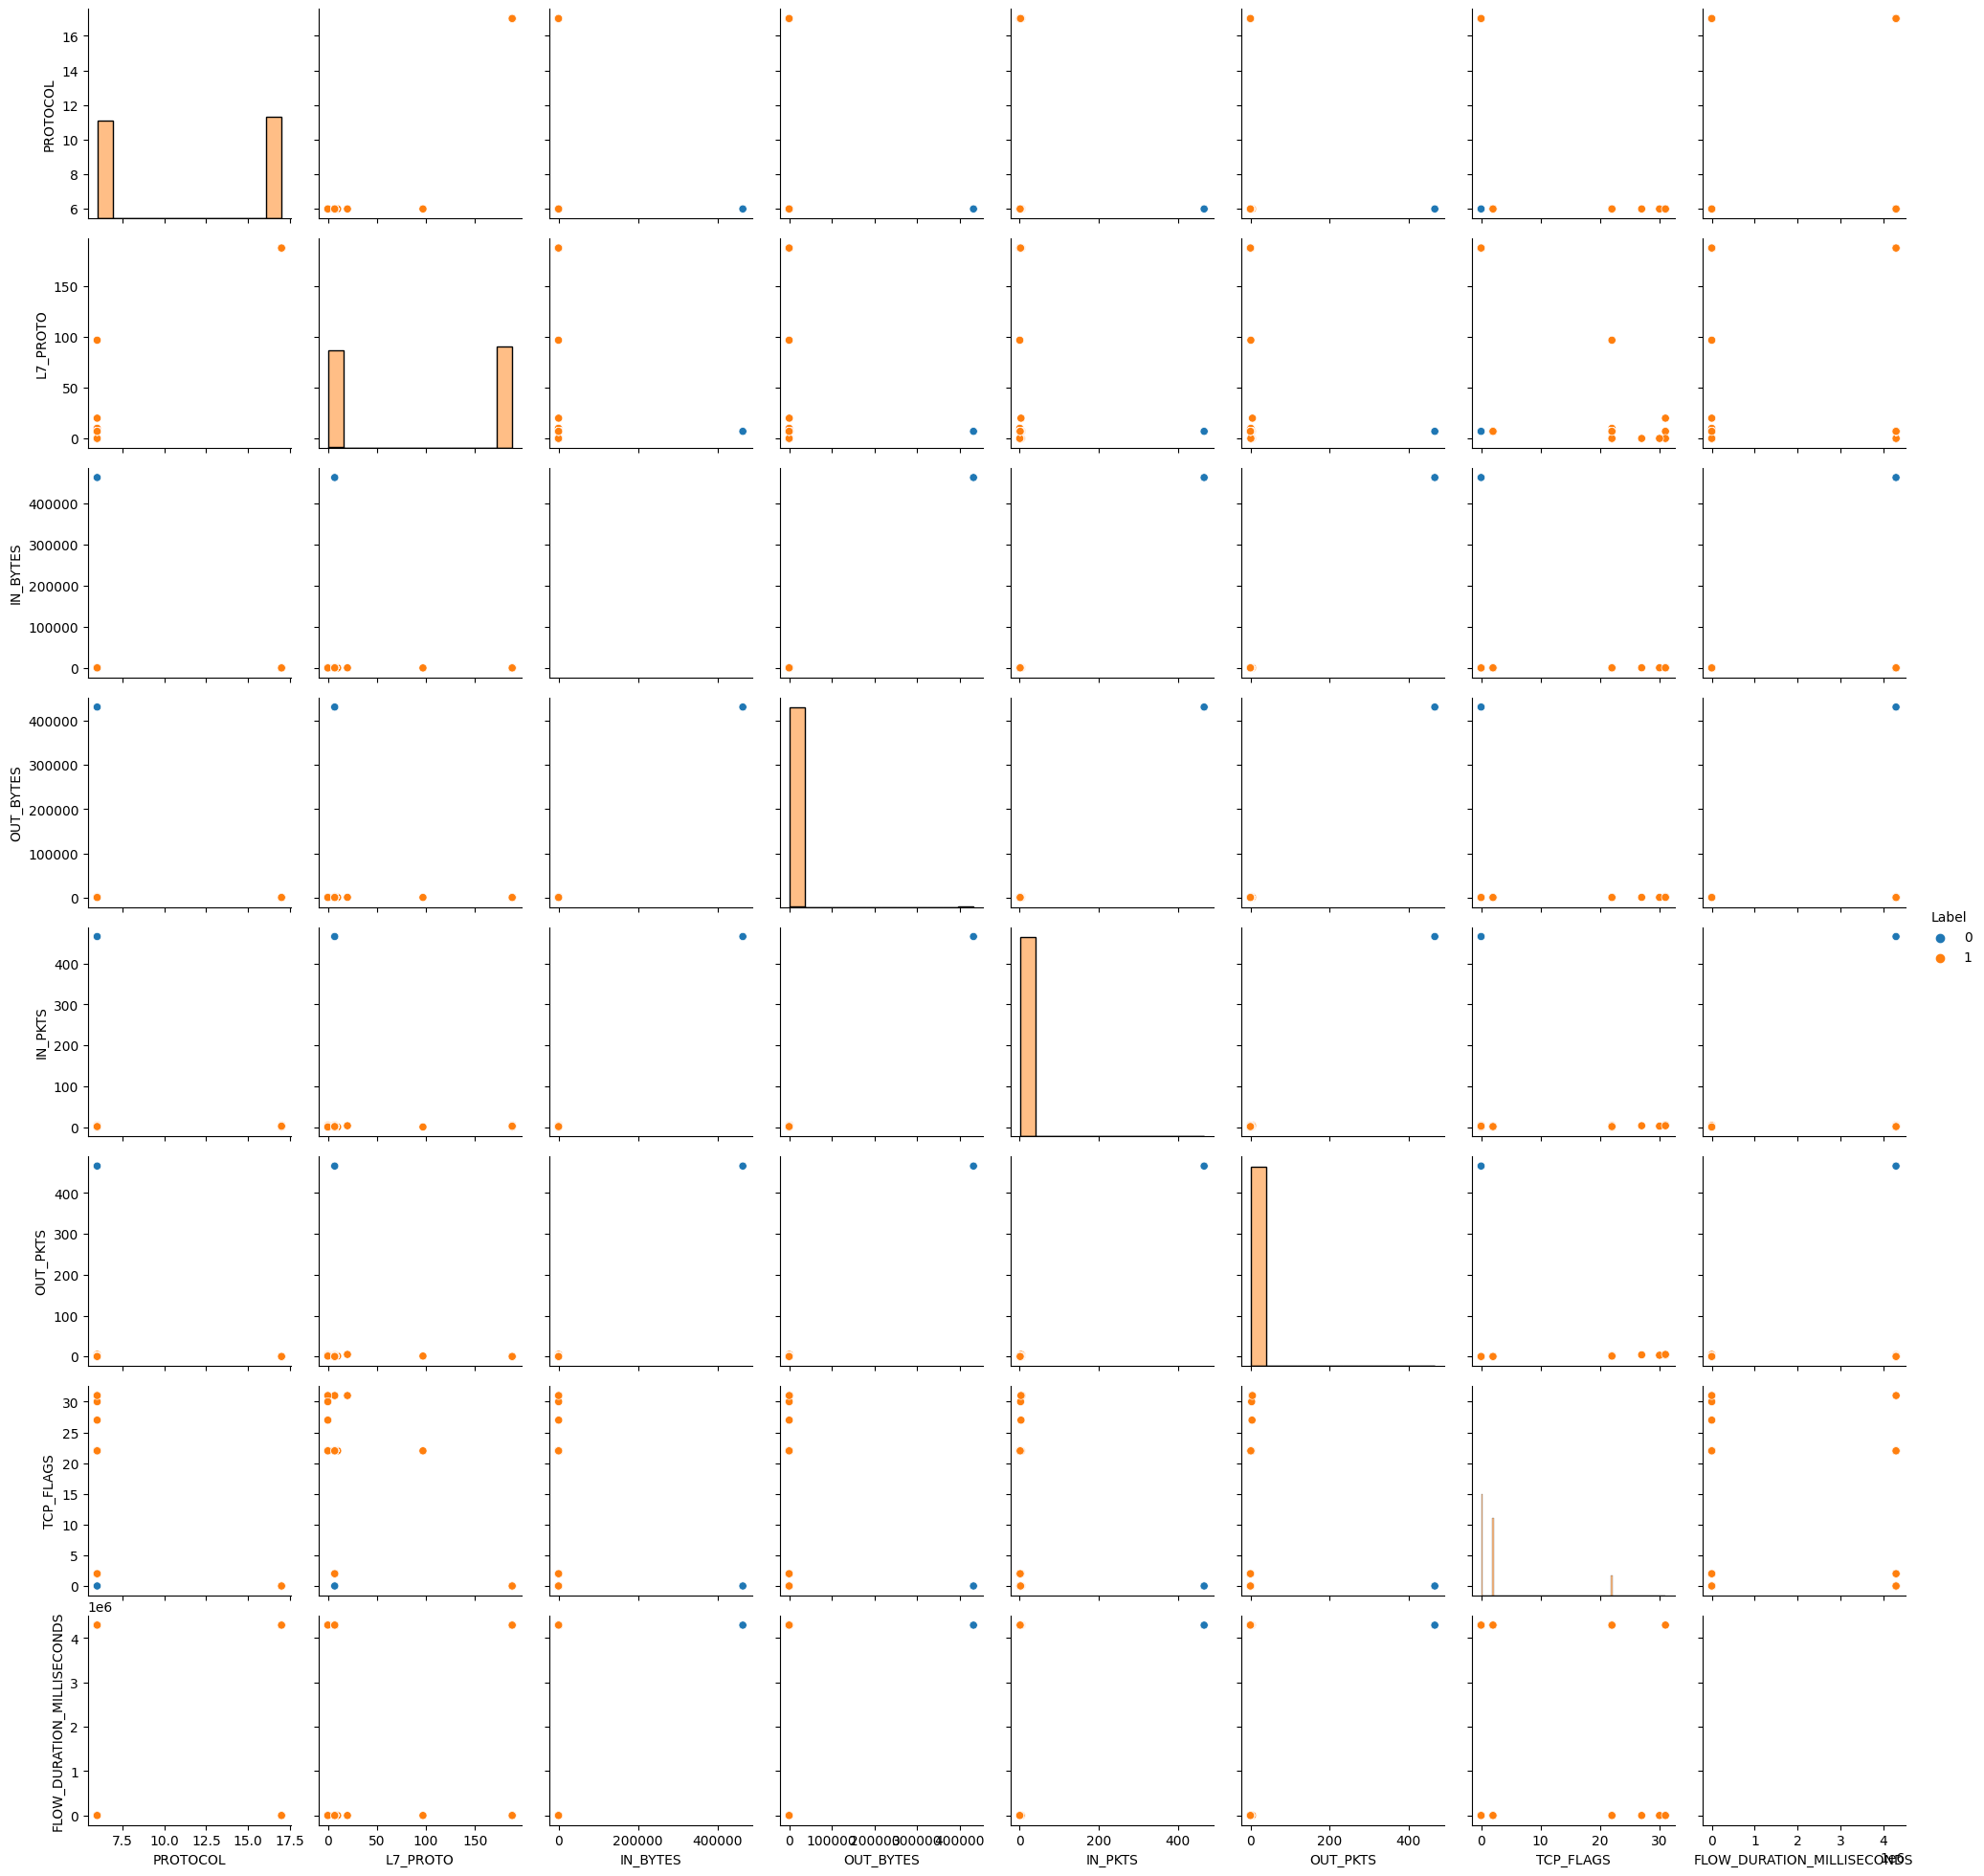

In [6]:
g = sn.PairGrid(df1, hue="Label")
g.map_diag(sn.histplot)
g.map_offdiag(sn.scatterplot)
g.add_legend()

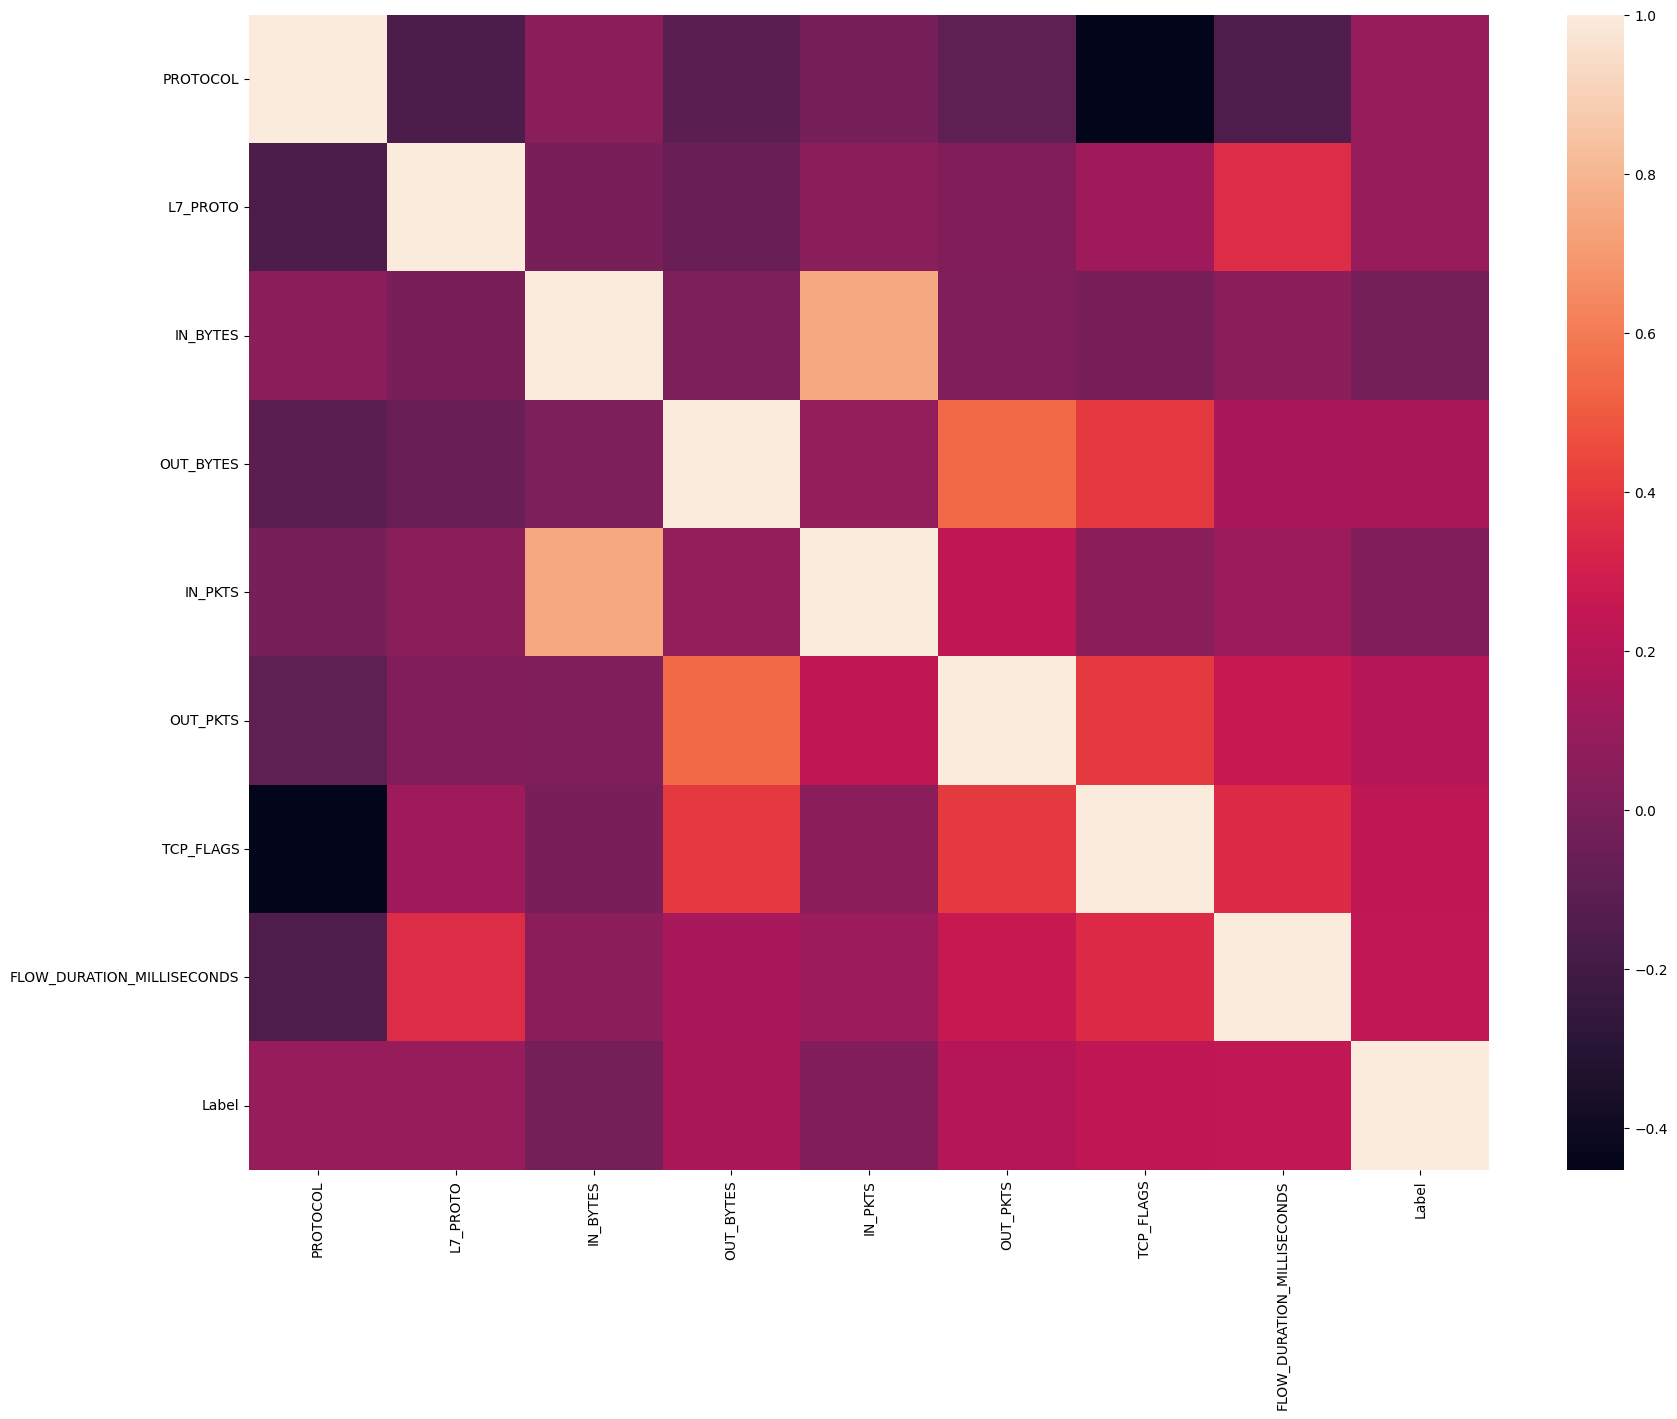

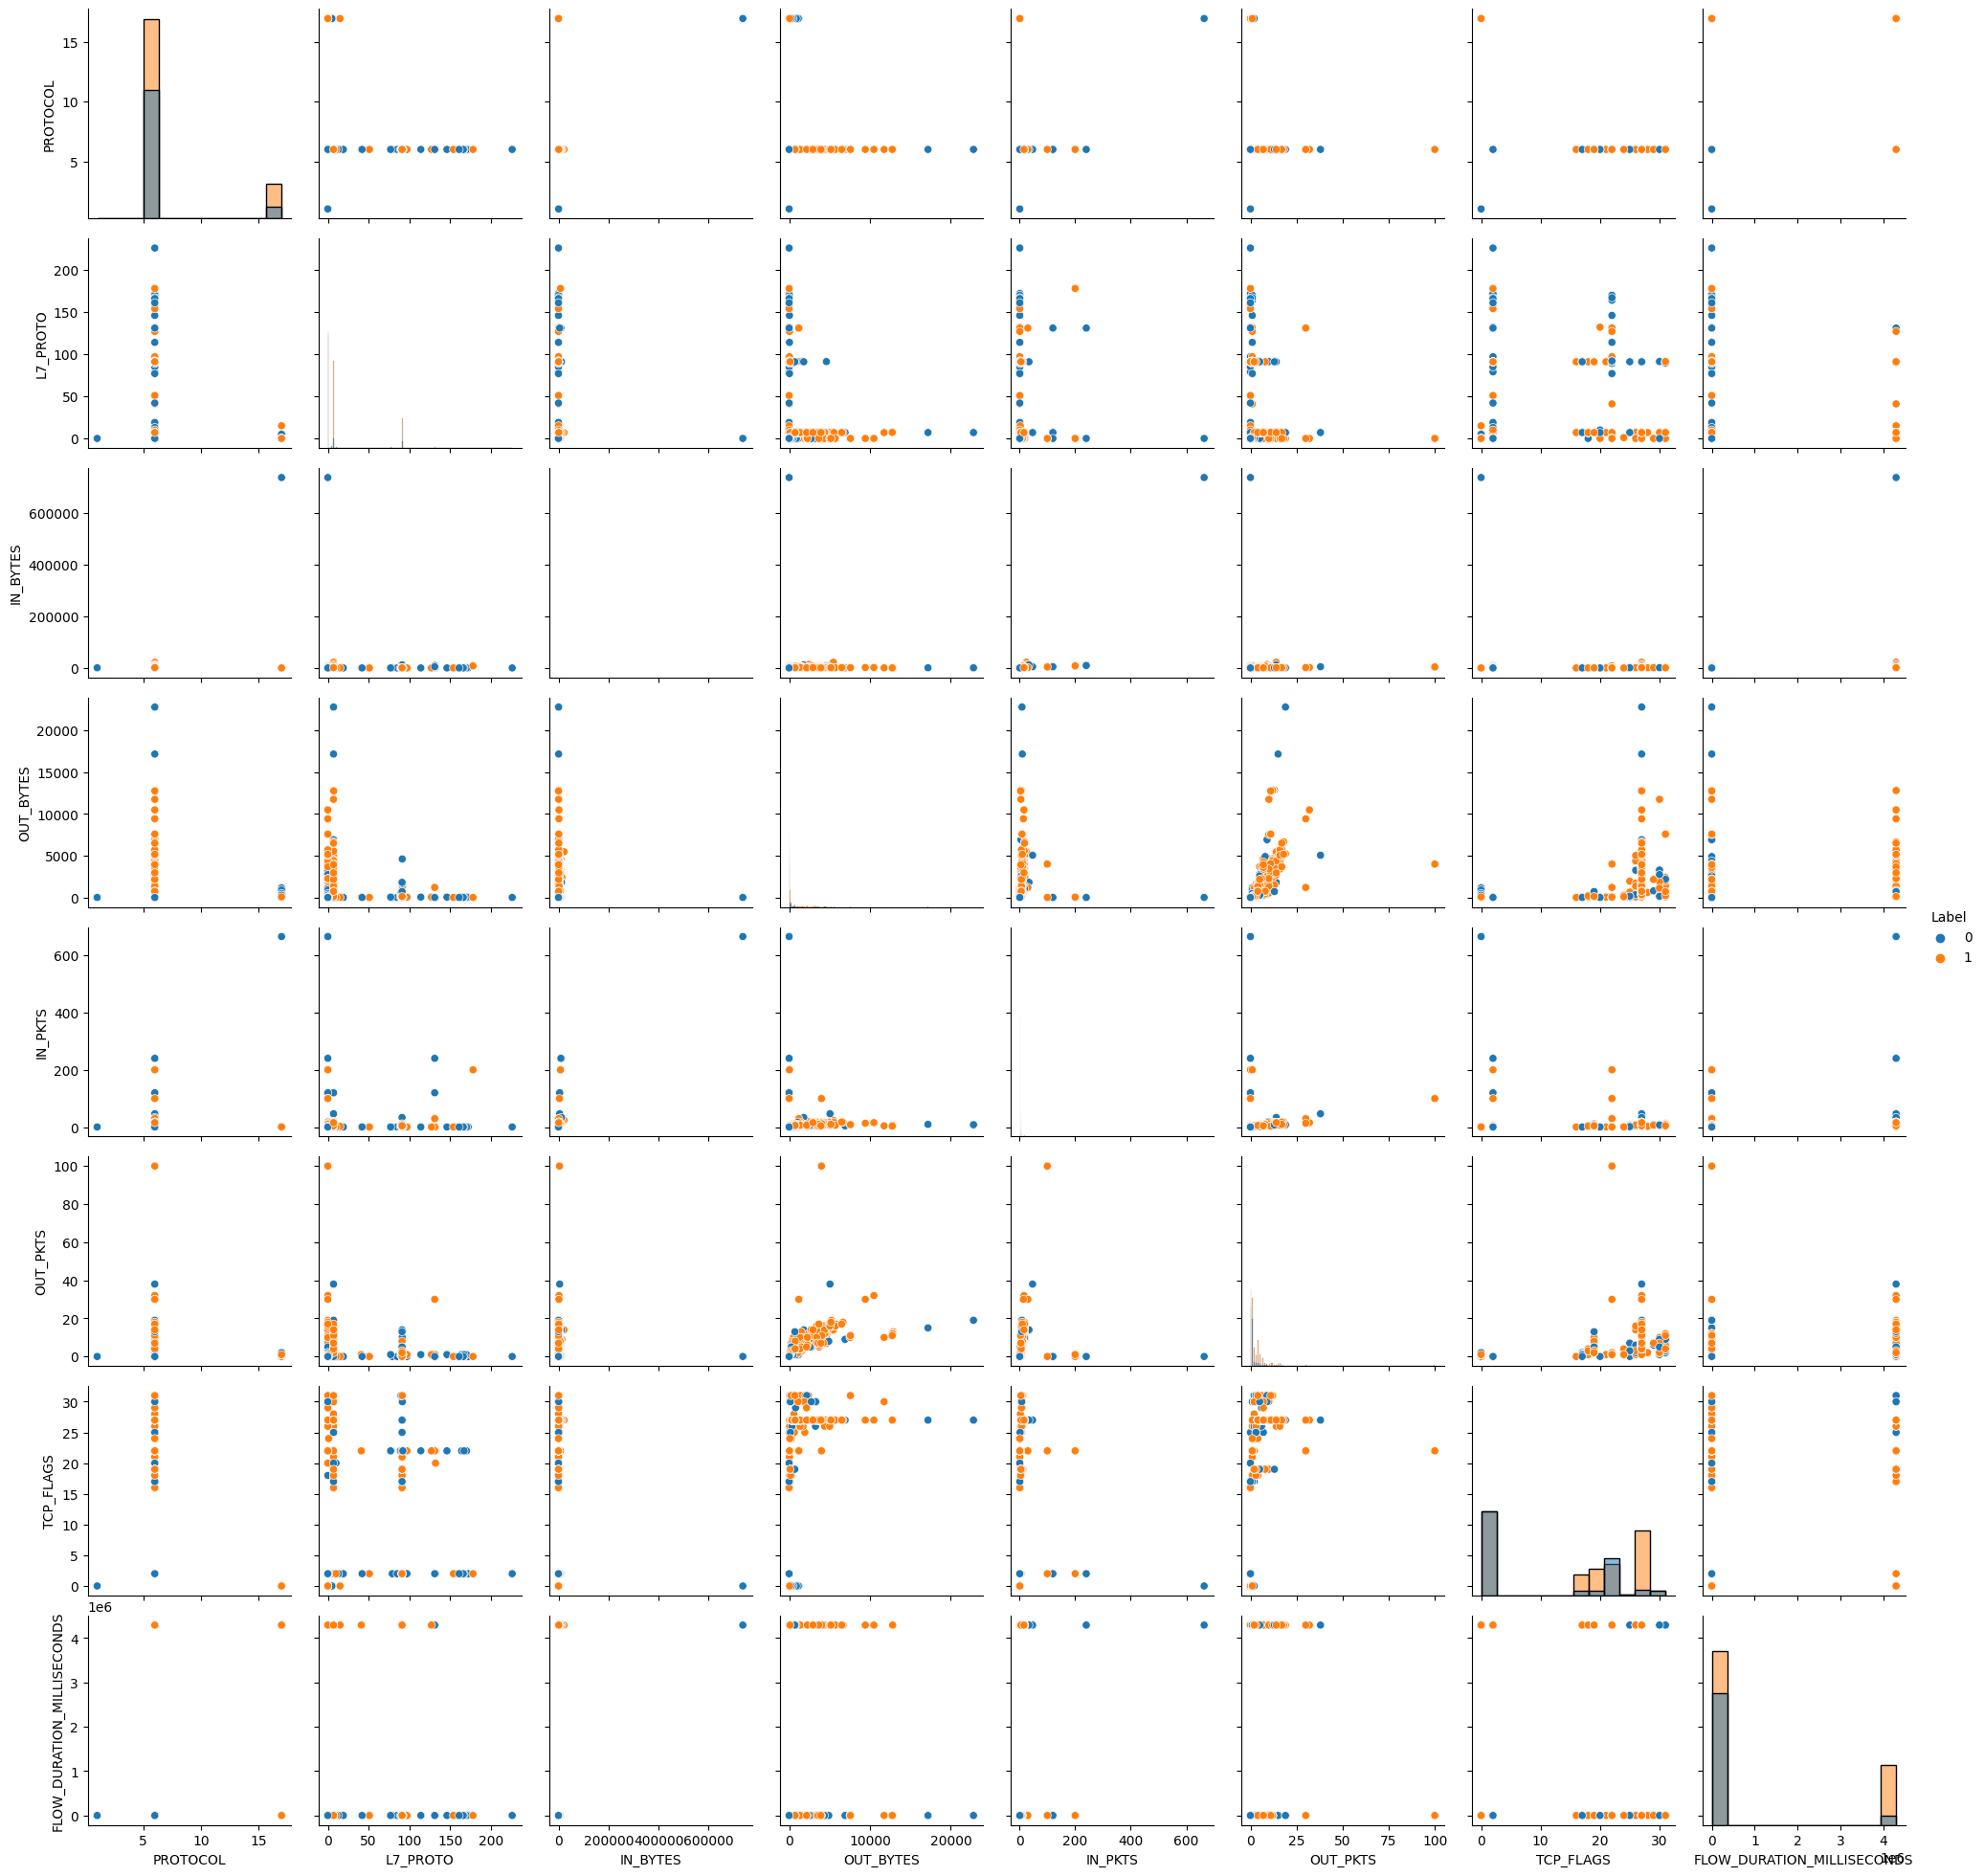

In [4]:
df2 = df_ToN.sample(n=2000, random_state=1)

matrix = df2.corr()
plt.subplots(figsize=(20,15))
sn.heatmap(matrix)#, annot=True)
plt.show()

g = sn.PairGrid(df2, hue="Label")
g.map_diag(sn.histplot)
g.map_offdiag(sn.scatterplot)
g.add_legend()

In [47]:
df_BoT = df_BoT.sample(frac=1).reset_index(drop=True)
df = pd.concat([df_BoT, df_ToN]).reset_index(drop=True)

In [48]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [49]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [50]:
l2 = df_BoT.shape[0]
l1 = int(0.9*l2)

In [51]:
#Train dataset
X_train = X[:l1]
y_train = y[:l1]

#Train dataset
X_val = X[l1:l2]
y_val = y[l1:l2]

#Test dataset
X_test = X[l2:]
y_test = y[l2:]

In [52]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [53]:
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [54]:
y_pred_val = rf_classifier.predict(X_val)
#print(np.concatenate((y_pred_val.reshape(len(y_pred_val),1), y_val.reshape(len(y_val),1)),1))

cm = confusion_matrix(y_val, y_pred_val)
print(cm)
accuracy_score(y_val, y_pred_val)

[[1147   62]
 [  62 3710]]


0.9751054005219836

In [55]:
y_pred = rf_classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 54468 102220]
 [ 29586 547255]]


0.8203124893494327

In [ ]:
svc_classifier = SVC(kernel = 'rbf', random_state = 0)
svc_classifier.fit(X_train[:30000,:], y_train[:30000])

In [54]:
y_pred_val = svc_classifier.predict(X_val[:10000,:])
#print(np.concatenate((y_pred_val.reshape(len(y_pred_val),1), y_val.reshape(len(y_val),1)),1))

cm = confusion_matrix(y_val[:10000], y_pred_val)
print(cm)
accuracy_score(y_val[:10000], y_pred_val)

[[   3   32]
 [   1 9964]]


0.9967

In [55]:
y_pred = svc_classifier.predict(X_test[:10000,:])
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

cm = confusion_matrix(y_test[:10000], y_pred)
print(cm)
accuracy_score(y_test[:10000], y_pred)

[[ 619 9221]
 [  90   70]]


0.0689

In [5]:
#df_UQ1 = pd.read_parquet('../data/parquet/netflow/original/NF-UQ-NIDS_chunks')
df_UQ2 = dd.read_parquet('../data/parquet/netflow/original/NF-UQ-NIDS-v2_chunks')

In [7]:
df_UQ2.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack,Dataset
0,192.168.100.148,65389,192.168.100.7,80,6,7.0,420,3,0,0,...,0,35840,140,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
1,192.168.100.148,11154,192.168.100.5,80,6,7.0,280,2,40,1,...,0,0,0,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
2,192.168.1.31,42062,192.168.1.79,1041,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
3,192.168.1.34,46849,192.168.1.79,9110,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
4,192.168.1.30,50360,192.168.1.152,1084,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2


In [4]:
df_UQ2 = df_UQ2.drop_duplicates()

In [8]:
npa = df_UQ2.to_dask_array().compute()

In [ ]:
del npa